In [1]:
import numpy as np
import pandas as pd

from orion.data import load_signal

/Users/sarah/opt/anaconda3/envs/ganf/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


# 1. Data

In [2]:
signal_name = 'multivariate/S-1'

data = load_signal(signal_name)

data.head()

,timestamp,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,1222819200,-0.366359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1222840800,-0.394108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1222862400,0.403625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1222884000,-0.362759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1222905600,-0.370746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. Pipeline

In [3]:
from mlblocks import MLPipeline

pipeline_name = 'ganf'

pipeline = MLPipeline(pipeline_name)

/Users/sarah/opt/anaconda3/envs/ganf/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
hyperparameters = {
    'orion.primitives.ganf.GANFModel#1': {
        'interval': 21600,
        'window_size': 60,
        'stride_size': 10,
        'batch_size': 512,
        'validation_split': 0.1,
        'epochs': 1,
        'verbose': True
    },
    'orion.primitives.timeseries_anomalies.find_anomalies#1': {
        'fixed_threshold': False
    }
}

pipeline.set_hyperparameters(hyperparameters)

In [5]:
pipeline.primitives

['orion.primitives.ganf.GANFModel',
 'orion.primitives.timeseries_anomalies.find_anomalies']

## 2.1 ``orion.primitives.ganf.GANFModel``

In [6]:
context = pipeline.fit(data, output_=0)
context.keys()

/Users/sarah/opt/anaconda3/envs/ganf/lib/python3.7/site-packages/orion/primitives/ganf.py:461: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.A = torch.tensor(init, requires_grad=True, device=device)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.34s/it]


[0] Epoch: 0/1, train -log_prob: 1.43, valid -log_prob: 0.93
rho: 1.0, alpha 0.0, h 0.7662887573242188


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.29s/it]


[1] Epoch: 0/1, train -log_prob: 1.06, valid -log_prob: 0.81
rho: 1.0, alpha 0.7662887573242188, h 0.71417236328125


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.29s/it]


[1] Epoch: 0/1, train -log_prob: 0.71, valid -log_prob: 0.67
rho: 10.0, alpha 0.7662887573242188, h 0.6654510498046875


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.33s/it]


[1] Epoch: 0/1, train -log_prob: 0.31, valid -log_prob: 0.52
rho: 100.0, alpha 0.7662887573242188, h 0.6196975708007812


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.28s/it]


[1] Epoch: 0/1, train -log_prob: -0.15, valid -log_prob: 0.49
rho: 1000.0, alpha 0.7662887573242188, h 0.5770092010498047


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.07s/it]


[1] Epoch: 0/1, train -log_prob: -0.69, valid -log_prob: 0.91
rho: 10000.0, alpha 0.7662887573242188, h 0.5369014739990234


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.26s/it]


[1] Epoch: 0/1, train -log_prob: -1.12, valid -log_prob: 0.38
rho: 100000.0, alpha 0.7662887573242188, h 0.4994697570800781


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.27s/it]


[1] Epoch: 0/1, train -log_prob: -1.37, valid -log_prob: 0.25
rho: 1000000.0, alpha 0.7662887573242188, h 0.4643898010253906


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.31s/it]


[1] Epoch: 0/1, train -log_prob: -1.51, valid -log_prob: -0.06
rho: 10000000.0, alpha 0.7662887573242188, h 0.4315834045410156


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.27s/it]


[1] Epoch: 0/1, train -log_prob: -1.61, valid -log_prob: 0.06
rho: 100000000.0, alpha 0.7662887573242188, h 0.40087127685546875


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.28s/it]


[1] Epoch: 0/1, train -log_prob: -1.73, valid -log_prob: -0.02
rho: 1000000000.0, alpha 0.7662887573242188, h 0.3721790313720703


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.29s/it]


[2] Epoch: 0/1, train -log_prob: -1.79, valid -log_prob: 0.09
rho: 1000000000.0, alpha 372179032.13835907, h 0.34530067443847656


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.29s/it]


[2] Epoch: 0/1, train -log_prob: -1.87, valid -log_prob: 0.29
rho: 10000000000.0, alpha 372179032.13835907, h 0.3201770782470703


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.10s/it]


[2] Epoch: 0/1, train -log_prob: -1.91, valid -log_prob: 0.35
rho: 100000000000.0, alpha 372179032.13835907, h 0.2967109680175781


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.31s/it]


[2] Epoch: 0/1, train -log_prob: -1.94, valid -log_prob: 1.03
rho: 1000000000000.0, alpha 372179032.13835907, h 0.27477073669433594


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.30s/it]


[2] Epoch: 0/1, train -log_prob: -2.01, valid -log_prob: 0.94
rho: 10000000000000.0, alpha 372179032.13835907, h 0.25431251525878906


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.27s/it]


[2] Epoch: 0/1, train -log_prob: -2.05, valid -log_prob: 1.99
rho: 100000000000000.0, alpha 372179032.13835907, h 0.23516273498535156


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.47s/it]


[2] Epoch: 0/1, train -log_prob: -2.09, valid -log_prob: 2.09
rho: 1000000000000000.0, alpha 372179032.13835907, h 0.21735572814941406


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.71s/it]

[final] Epoch: 0/1, train -log_prob: -2.10, valid -log_prob: 3.34
rho: 1e+16, alpha 2173557653673172.8, h 0.2006816864013672


dict_keys(['X', 'errors', 'index'])

## 2.2 ``orion.primitives.timeseries_anomalies.find_anomalies``

In [7]:
context = pipeline.fit(**context, start_=1, output_=1)
context.keys()

/Users/sarah/opt/anaconda3/envs/ganf/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/sarah/opt/anaconda3/envs/ganf/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/sarah/opt/anaconda3/envs/ganf/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/sarah/opt/anaconda3/envs/ganf/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/sarah/opt/anaconda3/envs/ganf/lib/python3.7/site-packages/scipy/optimize/optimize.py:761: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
/User

dict_keys(['errors', 'index', 'X', 'y'])

In [8]:
context['y']

array([[1.38805920e+09, 1.41441120e+09, 1.29664103e+00]])

# 3. Visualize

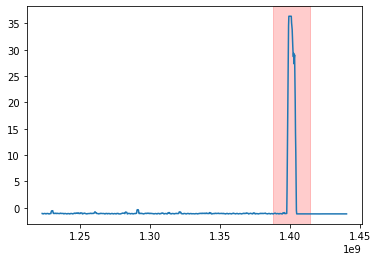

In [9]:
import matplotlib.pyplot as plt

plt.plot(context['index'], context['errors'])
for anomaly in context['y']:
    plt.axvspan(anomaly[0], anomaly[1], color='r', alpha=0.2)
    
plt.show()